# Logistic Regression

In [16]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
import numpy as np

dataset=pd.read_csv('Social_Network_Ads.csv')

In [17]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [30]:
independent_var=['User ID','Age','EstimatedSalary','Purchased']

In [31]:
data=dataset[independent_var]
label=dataset.Purchased


In [32]:
data.head(3)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0


In [33]:
train_data,test_data,train_label,test_label=train_test_split(data,label,test_size=0.25)
train_data.shape,test_data.shape,train_label.shape,test_label.shape

((300, 4), (100, 4), (300,), (100,))

In [34]:
regressor=LogisticRegression()
regressor.fit(train_data, train_label)
predicted_test_label=regressor.predict(test_data)

In [35]:
confusion_matrix=metrics.confusion_matrix(test_label,predicted_test_label)
confusion_matrix

array([[66,  5],
       [13, 16]], dtype=int64)

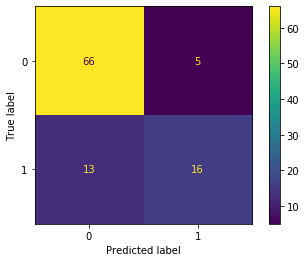

In [36]:
plot_confusion_matrix(regressor,test_data,test_label)

In [40]:
print('Accuracy : ',metrics.accuracy_score(test_label,predicted_test_label))
print('Precision : ',metrics.precision_score(test_label,predicted_test_label))
print('Recall : ',metrics.recall_score(test_label,predicted_test_label))

Accuracy :  0.82
Precision :  0.7619047619047619
Recall :  0.5517241379310345


# Support Vector Machines (SVM)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
sc=StandardScaler()
train_data=sc.fit_transform(train_data)
test_data= sc.transform(test_data)


In [44]:
svr= SVR(kernel="linear")
svr.fit(train_data, train_label)
predicted_test_label=svr.predict(test_data)

In [45]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_label, predicted_test_label))
print('Mean Squared Error: ', metrics.mean_squared_error(test_label, predicted_test_label))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(test_label, predicted_test_label)))

Mean Absolute Error:  0.09989929747558401
Mean Squared Error:  0.009979890312141087
Root Mean Squared Error:  0.09989940095987106
